In [ ]:
!pip install pyfolio

In [71]:
import yfinance as yf
import pandas as pd
import numpy as np
import pyfolio as pf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

# **Downlaod data using yfinance**

In [59]:
# List of tickers
tickers = ["TSLA", "BND", "SPY"]

# Define the folder where files will be saved
file_path = "/content/drive/MyDrive/Portfolio Management Optimization/data"  # Change to your preferred location

# Loop through each ticker and download data
for ticker in tickers:
    data = yf.download(ticker, start = "2015-01-01", end = "2025-01-31")

    # Save the data to CSV, including the ticker in the filename
    data.to_csv(f"{file_path}/{ticker}.csv") # Added ticker to the file name to create individual files

    print(f"{ticker} data saved to {file_path}/{ticker}.csv") # Updated print message to reflect the change

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

TSLA data saved to /content/drive/MyDrive/Portfolio Management Optimization/data/TSLA.csv
BND data saved to /content/drive/MyDrive/Portfolio Management Optimization/data/BND.csv
SPY data saved to /content/drive/MyDrive/Portfolio Management Optimization/data/SPY.csv


# **Load datasets**

In [60]:
TSLA = pd.read_csv('/content/drive/MyDrive/Portfolio Management Optimization/data/TSLA.csv')
BND = pd.read_csv('/content/drive/MyDrive/Portfolio Management Optimization/data/BND.csv')
SPY = pd.read_csv('/content/drive/MyDrive/Portfolio Management Optimization/data/SPY.csv')

# **Closing price dataframe for analysis**



In [61]:
# Create an empty DataFrame to store closing prices
closing_prices = pd.DataFrame()
# Loop through each ticker, download data, and store closing prices
for ticker in tickers:
    data = yf.download(ticker, start = "2015-01-01", end = "2025-01-31")["Close"]  # Select only 'Close' column
    closing_prices[ticker] = data  # Store closing prices

# Save the closing prices to a CSV file
closing_prices.to_csv(f'{file_path}/closing_prices.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# **Statistics**

In [62]:
closing_prices.head(10)

,TSLA,BND,SPY
Date,,,
2015-01-02,14.620667,62.387096,172.592880
2015-01-05,14.006000,62.568226,169.475937
2015-01-06,14.085333,62.749416,167.879639
2015-01-07,14.063333,62.787159,169.971588
2015-01-08,14.041333,62.689034,172.987747
2015-01-09,13.777333,62.794693,171.601501
2015-01-12,13.480667,62.877739,170.257294
2015-01-13,13.616667,62.938099,169.778366
2015-01-14,12.846000,63.081539,168.753357


In [63]:
# Display summary statistics
print("Statistics for Closing Prices:")
print(closing_prices.describe())

Statistics for Closing Prices:
              TSLA          BND          SPY
count  2535.000000  2535.000000  2535.000000
mean    117.848209    69.083444   316.067403
std     116.508288     4.777898   117.926909
min       9.578000    61.676933   156.800842
25%      17.228000    65.370346   214.841980
50%      30.298000    68.125977   277.117920
75%     221.525002    72.663246   405.869186
max     479.859985    78.588913   609.750000


# **Data cleaning**

In [64]:
#handling missing values
closing_prices.isnull().sum()

,0
TSLA,0
BND,0
SPY,0


# **Normalize data**

In [65]:
# Normalize (0-1 Scaling)
scaler_minmax = MinMaxScaler()
closing_prices_normalized = pd.DataFrame(scaler_minmax.fit_transform(closing_prices), columns=closing_prices.columns)

# **Plot Closing Prices Over Time**

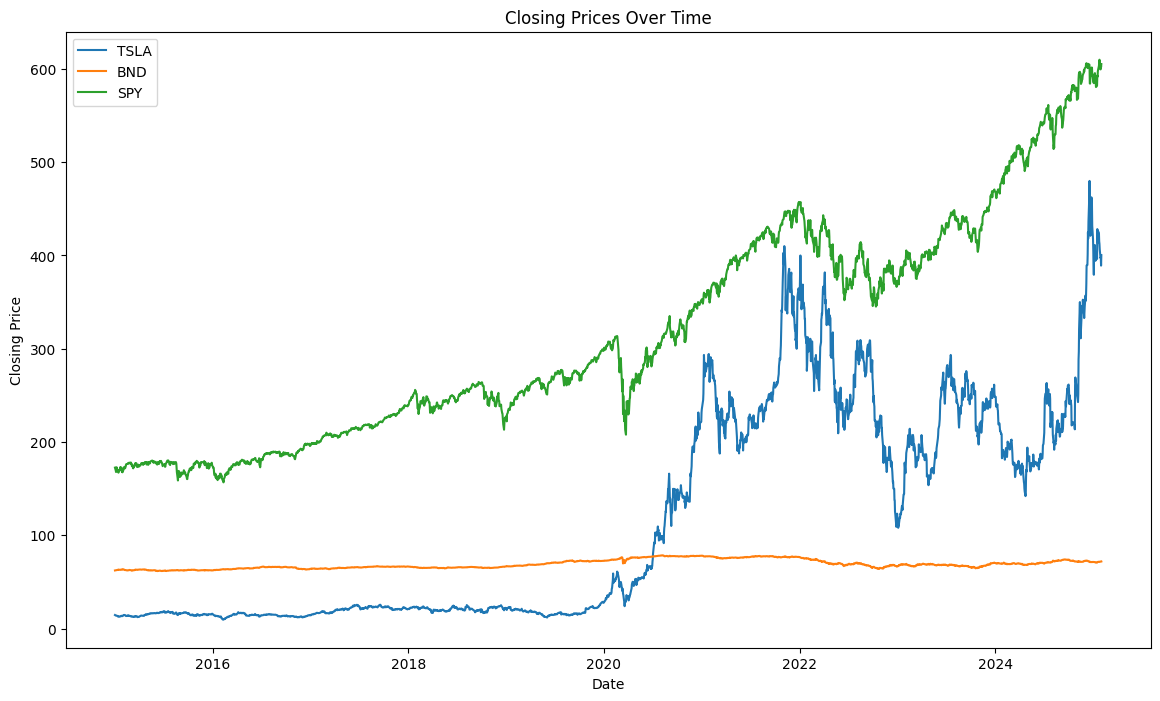

In [66]:
# Plot Closing Prices Over Time
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(closing_prices.index, closing_prices[ticker], label=ticker)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time')
plt.legend()
plt.show()

# **Calculate Daily Percentage Change**
The daily percentage change shows the day-to-day volatility of a stock. It helps identify:

*   Periods of high volatility (big swings in price)
*   Periods of stability (small daily changes)
* Potential risk levels for investment decisions

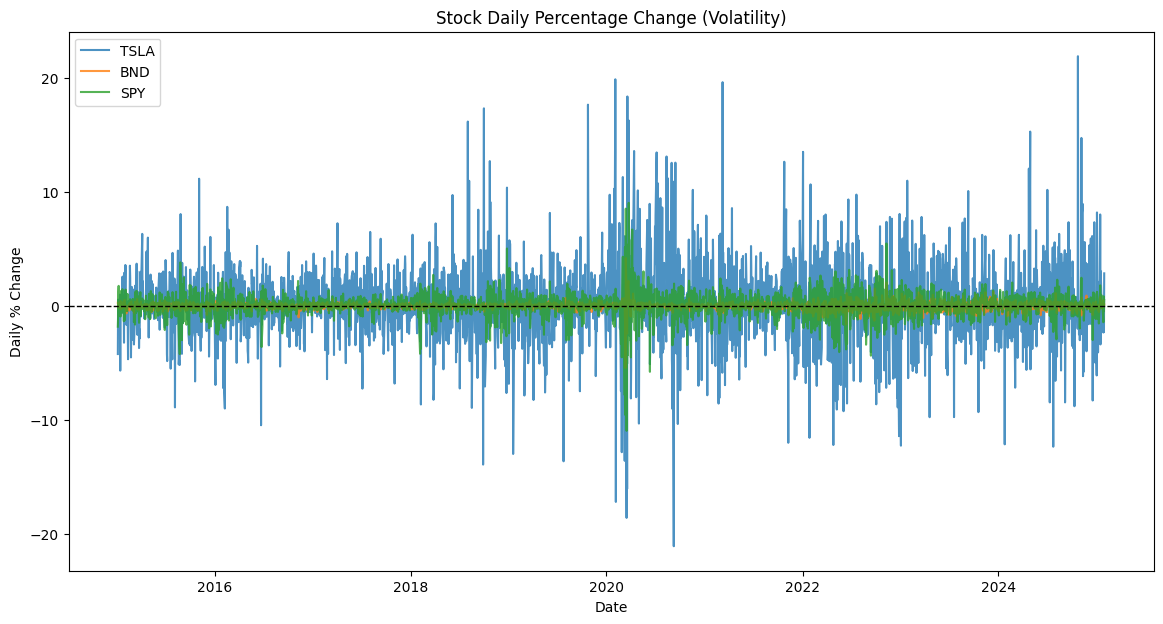

In [69]:
# Calculate Daily Percentage Change
daily_returns = closing_prices.pct_change() * 100  # Convert to percentage

# Drop NaN values (first row will be NaN)
daily_returns.dropna(inplace=True)
# Save to CSV
daily_returns.to_csv(f"{file_path}/daily_returns.csv")

# Plot Daily Percentage Change (Volatility)
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker, alpha=0.8)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add zero line for reference
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.title("Stock Daily Percentage Change (Volatility)")
plt.legend()

# **Rolling mean and Satandard deviation**

<Figure size 1400x800 with 0 Axes>

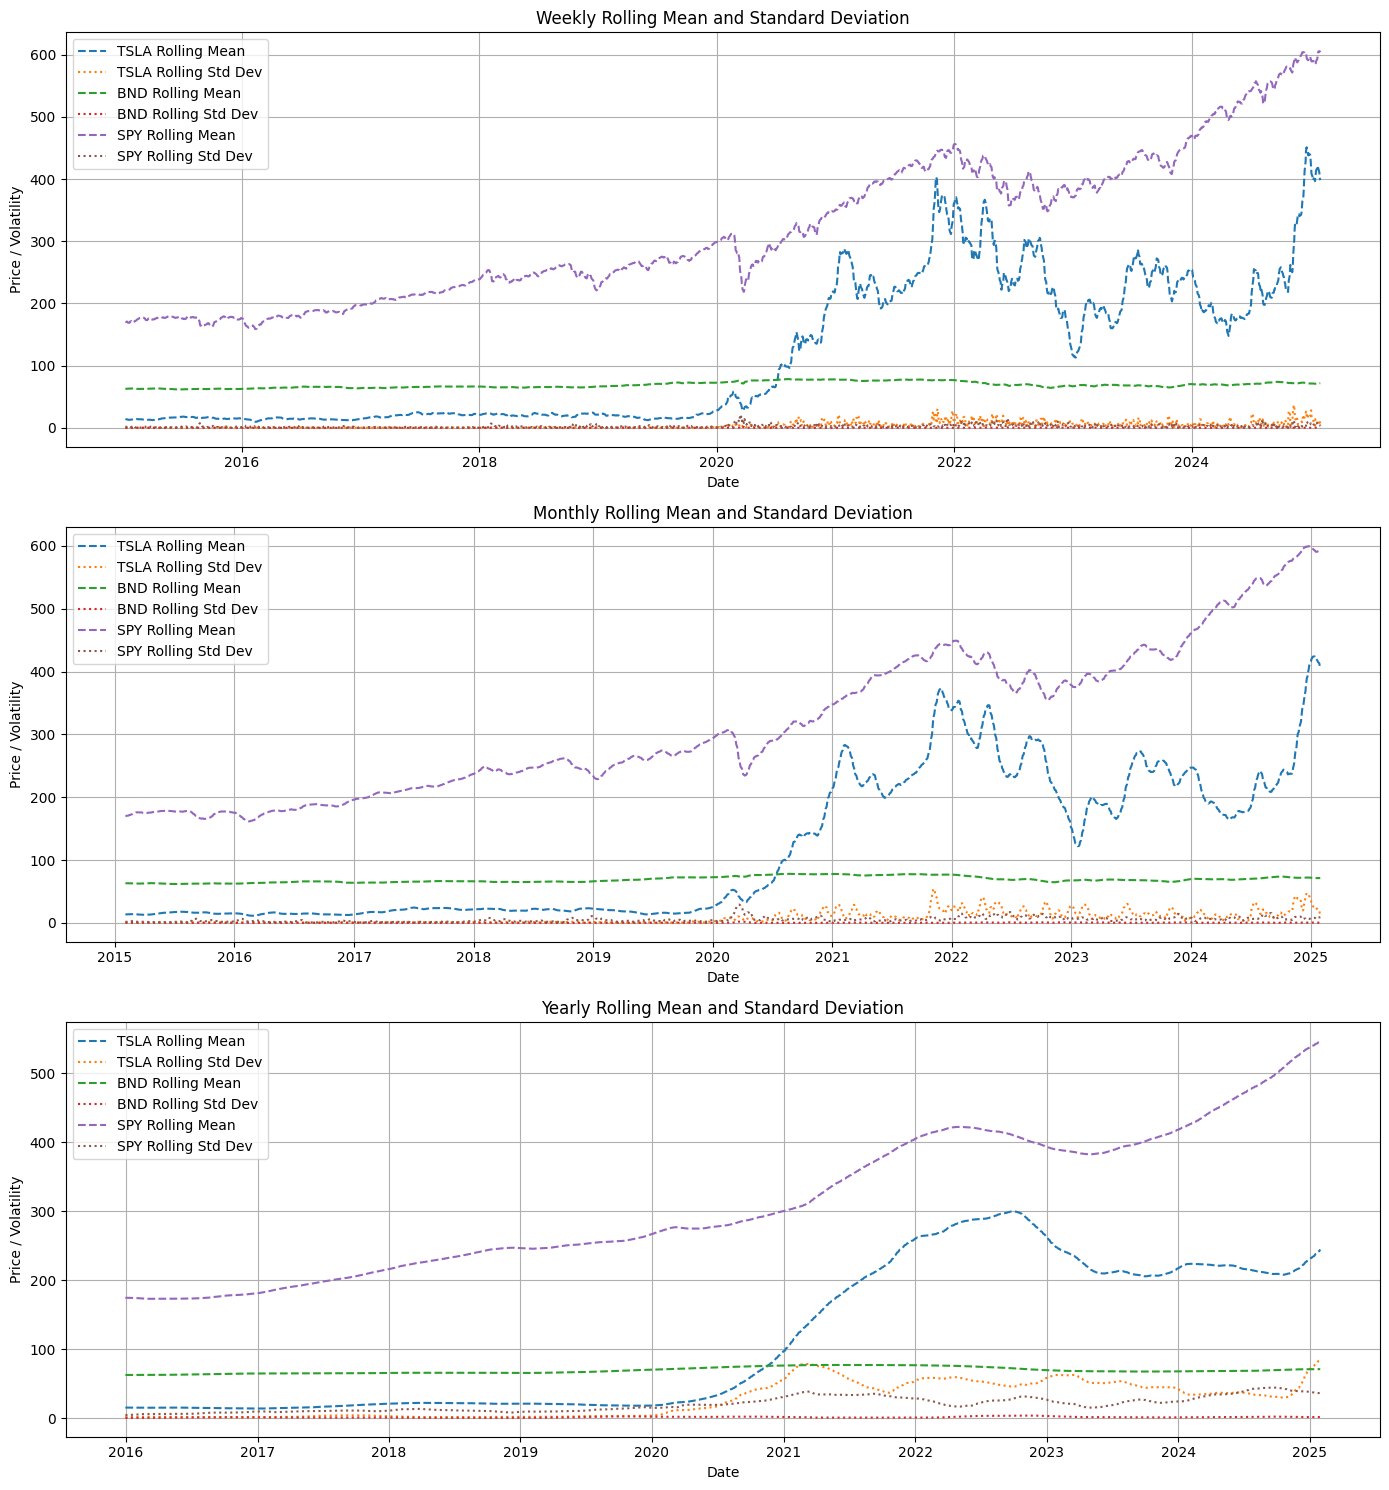

In [68]:
# Define the rolling windows for Weekly, Monthly, and Yearly
rolling_windows = {'Weekly': 5, 'Monthly': 21, 'Yearly': 252}
# Create a plot
plt.figure(figsize=(14, 8))
# Create subplots for each rolling window (3 subplots)
fig, axes = plt.subplots(3, 1, figsize=(14, 15))

# Loop through the rolling windows (Weekly, Monthly, Yearly)
for i, (window_label, window_size) in enumerate(rolling_windows.items()):
    ax = axes[i]  # Get the axis for the current subplot

    for ticker in tickers:
        # Calculate Rolling Mean and Rolling Standard Deviation
        rolling_mean = closing_prices[ticker].rolling(window=window_size).mean()
        rolling_std = closing_prices[ticker].rolling(window=window_size).std()

        # Plot Rolling Mean on the current subplot
        ax.plot(rolling_mean.index, rolling_mean, label=f'{ticker} Rolling Mean', linestyle='--')

        # Plot Rolling Standard Deviation (Volatility) on the current subplot
        ax.plot(rolling_std.index, rolling_std, label=f'{ticker} Rolling Std Dev', linestyle=':')

    ax.set_title(f"{window_label} Rolling Mean and Standard Deviation")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price / Volatility")
    ax.legend()
    ax.grid(True)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()

# **Outlier Detection and Analysis using Z-score**

📉 Outlier Dates with Significant Anomalies (Z-score > 3 or < -3):
            TSLA   BND   SPY
Date                        
2020-03-12  True  True  True
2020-03-16  True  True  True
2020-03-18  True  True  True


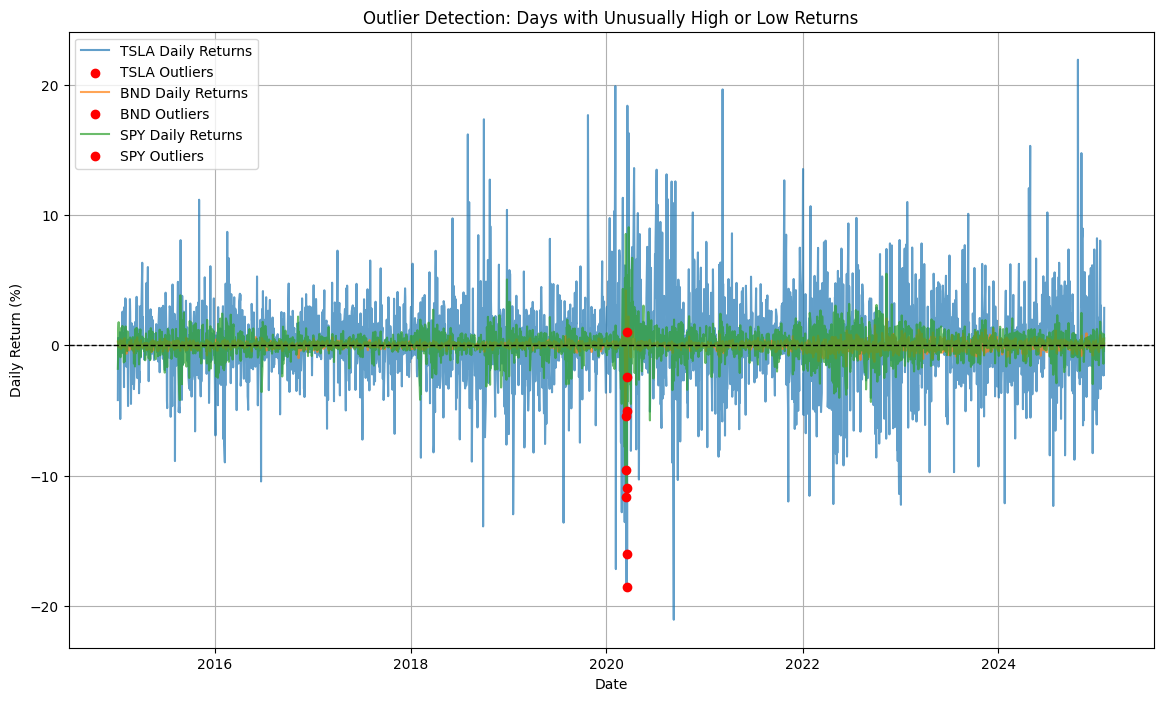

In [70]:

# Calculate Z-Score for daily returns (each ticker)
z_scores = (daily_returns - daily_returns.mean()) / daily_returns.std()

# Define threshold for outlier detection (Z-score above 3 or below -3)
outliers = (z_scores.abs() > 3)

# Identify and print outliers (days with unusually high/low returns)
outlier_dates = outliers[outliers == True].dropna()

# Display outliers
print("Outlier Dates with Significant Anomalies (Z-score > 3 or < -3):")
print(outlier_dates)

# Plot the daily returns and highlight outliers
plt.figure(figsize=(14, 8))

for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=f'{ticker} Daily Returns', alpha=0.7)

    # Highlight outliers for each ticker
    outlier_dates_ticker = outlier_dates[ticker]
    plt.scatter(outlier_dates_ticker.index, daily_returns.loc[outlier_dates_ticker.index, ticker],
                color='red', label=f'{ticker} Outliers', zorder=5)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add zero line for reference
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Outlier Detection: Days with Unusually High or Low Returns")
plt.legend()
plt.grid(True)
plt.show()

# **Seasonality and Trends**

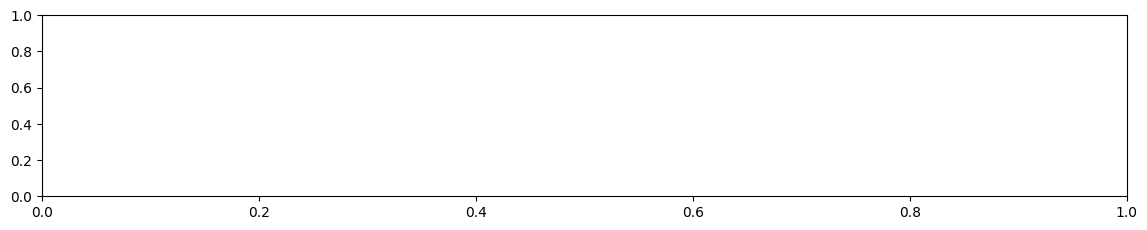

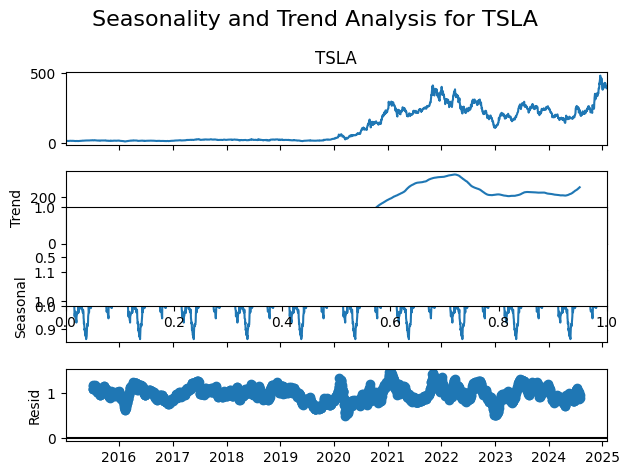

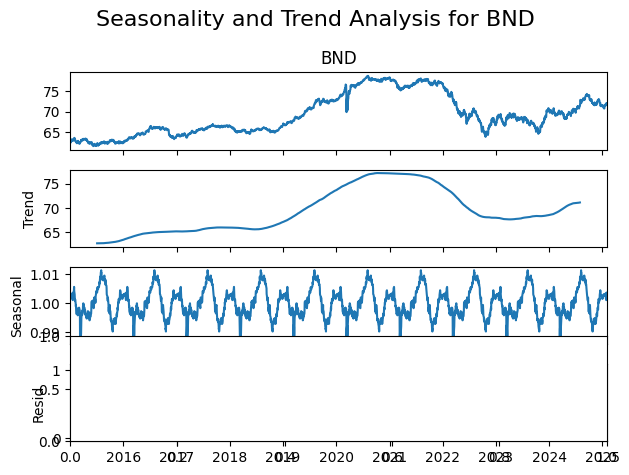

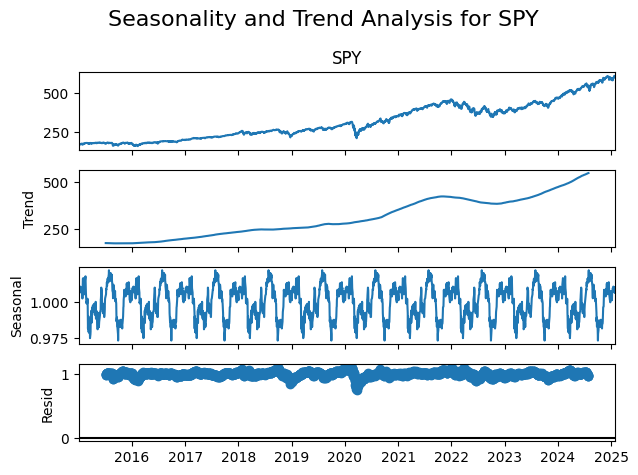

In [72]:
# Plotting Trend and Seasonality for each ticker
plt.figure(figsize=(14, 8))

for ticker in tickers:
    # Decompose the time series into trend, seasonal, and residual
    decomposition = seasonal_decompose(closing_prices[ticker], model='multiplicative', period=252)  # Use 252 trading days as the period

    # Plot decomposition components
    plt.subplot(len(tickers), 1, tickers.index(ticker) + 1)
    decomposition.plot()
    plt.suptitle(f"Seasonality and Trend Analysis for {ticker}", fontsize=16)
    plt.tight_layout()

plt.show()

# **Analyzing Seasonality and Trends:**
Trend Component: Will show if the stock has an upward, downward, or flat trend over time.

*   TSLA has flat ttrend untile 2020 and upward trends for the rest
*   BND has both upward and downward trends
*   SPY has upward trend

Seasonal Component: This part shows if the stock has any seasonal patterns. For example, certain months or quarters might show stronger performance due to external factors like holidays or earnings reports.
Residual Component: Shows the random noise or any other unexplained fluctuations in the stock price.


# **Analyze Volatility**

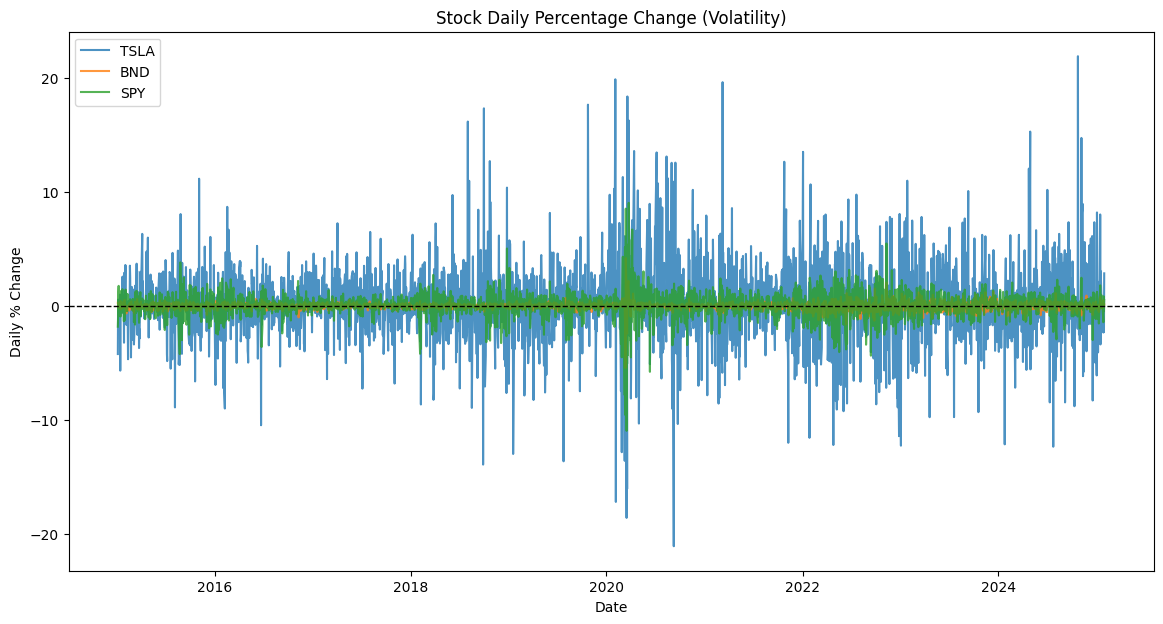

In [73]:
# Volatility
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker, alpha=0.8)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add zero line for reference
plt.xlabel("Date")
plt.ylabel("Daily % Change")
plt.title("Stock Daily Percentage Change (Volatility)")
plt.legend()